# Import Flat Files

Langkah awal yang dilakukan sebelum melakukan import adalah memastikan apakah file yang ingin kita impor berada di dalam satu folder atau tidak dengan program yang kita gunakan. Sebenarnya hal ini  tidak perlu dilakukan, jika kita mendefinisikan path dari file yang ingin kita baca. 

Pada bagian ini kita akan menggunakan data seaslug.txt. Pada langkah ini kita akan membaca file txt tersebut dengan menggunakan perintah open dan close.

In [3]:
file = open('seaslug.txt', mode='r')
print(file.read())

#cek apakah file telah ditutup
print(file.closed)

#menutup file
file.close()
print(file.closed)

Time	Percent
99	0.067
99	0.133
99	0.067
99	0
99	0
0	0.5
0	0.467
0	0.857
0	0.5
0	0.357
0	0.533
5	0.467
5	0.467
5	0.125
5	0.4
5	0.214
5	0.4
10	0.067
10	0.067
10	0.333
10	0.333
10	0.133
10	0.133
15	0.267
15	0.286
15	0.333
15	0.214
15	0
15	0
20	0.267
20	0.2
20	0.267
20	0.437
20	0.077
20	0.067
25	0.133
25	0.267
25	0.412
25	0
25	0.067
25	0.133
30	0
30	0.071
30	0
30	0.067
30	0.067
30	0.133
False
True


Pada proses pencetakan isi file pada python console, biasanya kita hanya ingin mencetak beberapa baris saja. Hal ini dapat dilakukan dengan menggunakan metode readline. Selanjutnya, dengan menggunakan context manager dalam membuka file untuk menyingkat proses buka dan tutup file.

In [4]:
with open('seaslug.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

Time	Percent

99	0.067

99	0.133



Numpy merupakan salah satu package yang dapat digunakan untuk membaca flat files. 

<class 'numpy.ndarray'>


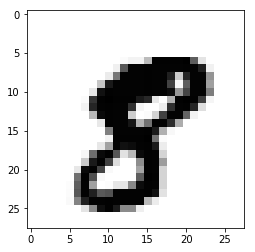

In [30]:
import numpy as np
import matplotlib.pyplot as plt

digits = np.loadtxt('mnist_kaggle_some_rows.csv', delimiter=',')
print(type(digits))

im = digits[10][1:]
im_sq = im.reshape((28,28))

plt.imshow(im_sq, cmap='Greys')
plt.show()

Pada data seaslug.txt dapat dilihat bahwa file tersebut memiliki header string, sehingga data yang dibaca akan berupa object. Maka dari itu, agar data ini dapat dibaca oleh numpy, diberikan kondisi dtype. 

In [36]:
data = np.loadtxt('seaslug.txt', delimiter='\t',dtype=str)
print(data[0])

['Time' 'Percent']


Selain itu, untuk menghilangkan data yang tidak sesuai dapat dilakukan pembuangan data menggunakan skiprows. 

In [40]:
data_float = np.loadtxt('seaslug.txt',delimiter='\t',skiprows=1, dtype=float)
print(data_float[9])

[0.    0.357]


Pada data seaslug ini, akan dilakukan plot antara waktu dan persentase perubahan seaslug. 

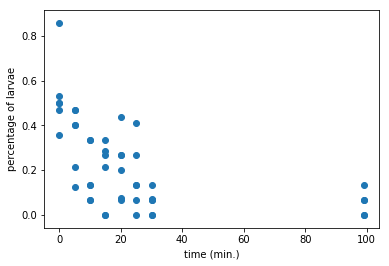

In [41]:
plt.scatter(data_float[:,0],data_float[:,1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

In [48]:
data = np.genfromtxt('titanic_sub.csv', delimiter=',', names=True, dtype=None)
print(data['Survived'][-4:])

[1 0 1 0]


C:\Users\ANDIKA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [51]:
data = np.recfromcsv('titanic_sub.csv')
print(data[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


C:\Users\ANDIKA\Anaconda3\lib\site-packages\numpy\lib\npyio.py:2266: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


Menggunakan pandas untuk membaca file menjadi pilihan yang tepat karena dataframe merupakan tools yang sangat baik untuk menyimpan flat files.

In [52]:
import pandas as pd
file='titanic_sub.csv'
df = pd.read_csv(file)
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [55]:
df = pd.read_csv('mnist_kaggle_some_rows.csv', nrows=5, header=None)
data_array = np.array(df)
print(type(data_array))

<class 'numpy.ndarray'>


In [57]:
df = pd.read_csv('seaslug.txt',sep='\t')
print(df.head())

   Time  Percent
0    99    0.067
1    99    0.133
2    99    0.067
3    99    0.000
4    99    0.000
